# External modules

In [52]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [44]:
library(extRemes)

data(FCwx)

data <- FCwx

In [45]:
str(data)

'data.frame':	36524 obs. of  8 variables:
 $ Year: int  1900 1900 1900 1900 1900 1900 1900 1900 1900 1900 ...
 $ Mn  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Dy  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MxT : int  39 43 55 50 50 52 50 48 47 48 ...
 $ MnT : int  10 9 23 24 16 10 14 9 25 10 ...
 $ Prec: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Snow: num  0 0 0 0 0 0 0 0 0 0 ...
 $ SnCv: num  NA NA NA NA NA NA NA NA NA NA ...


In [158]:
x_raw <- data$Prec
# x_raw <- data$MxT
# x_raw <- data$MnT
# x_raw <- data$SnCv

# Data description

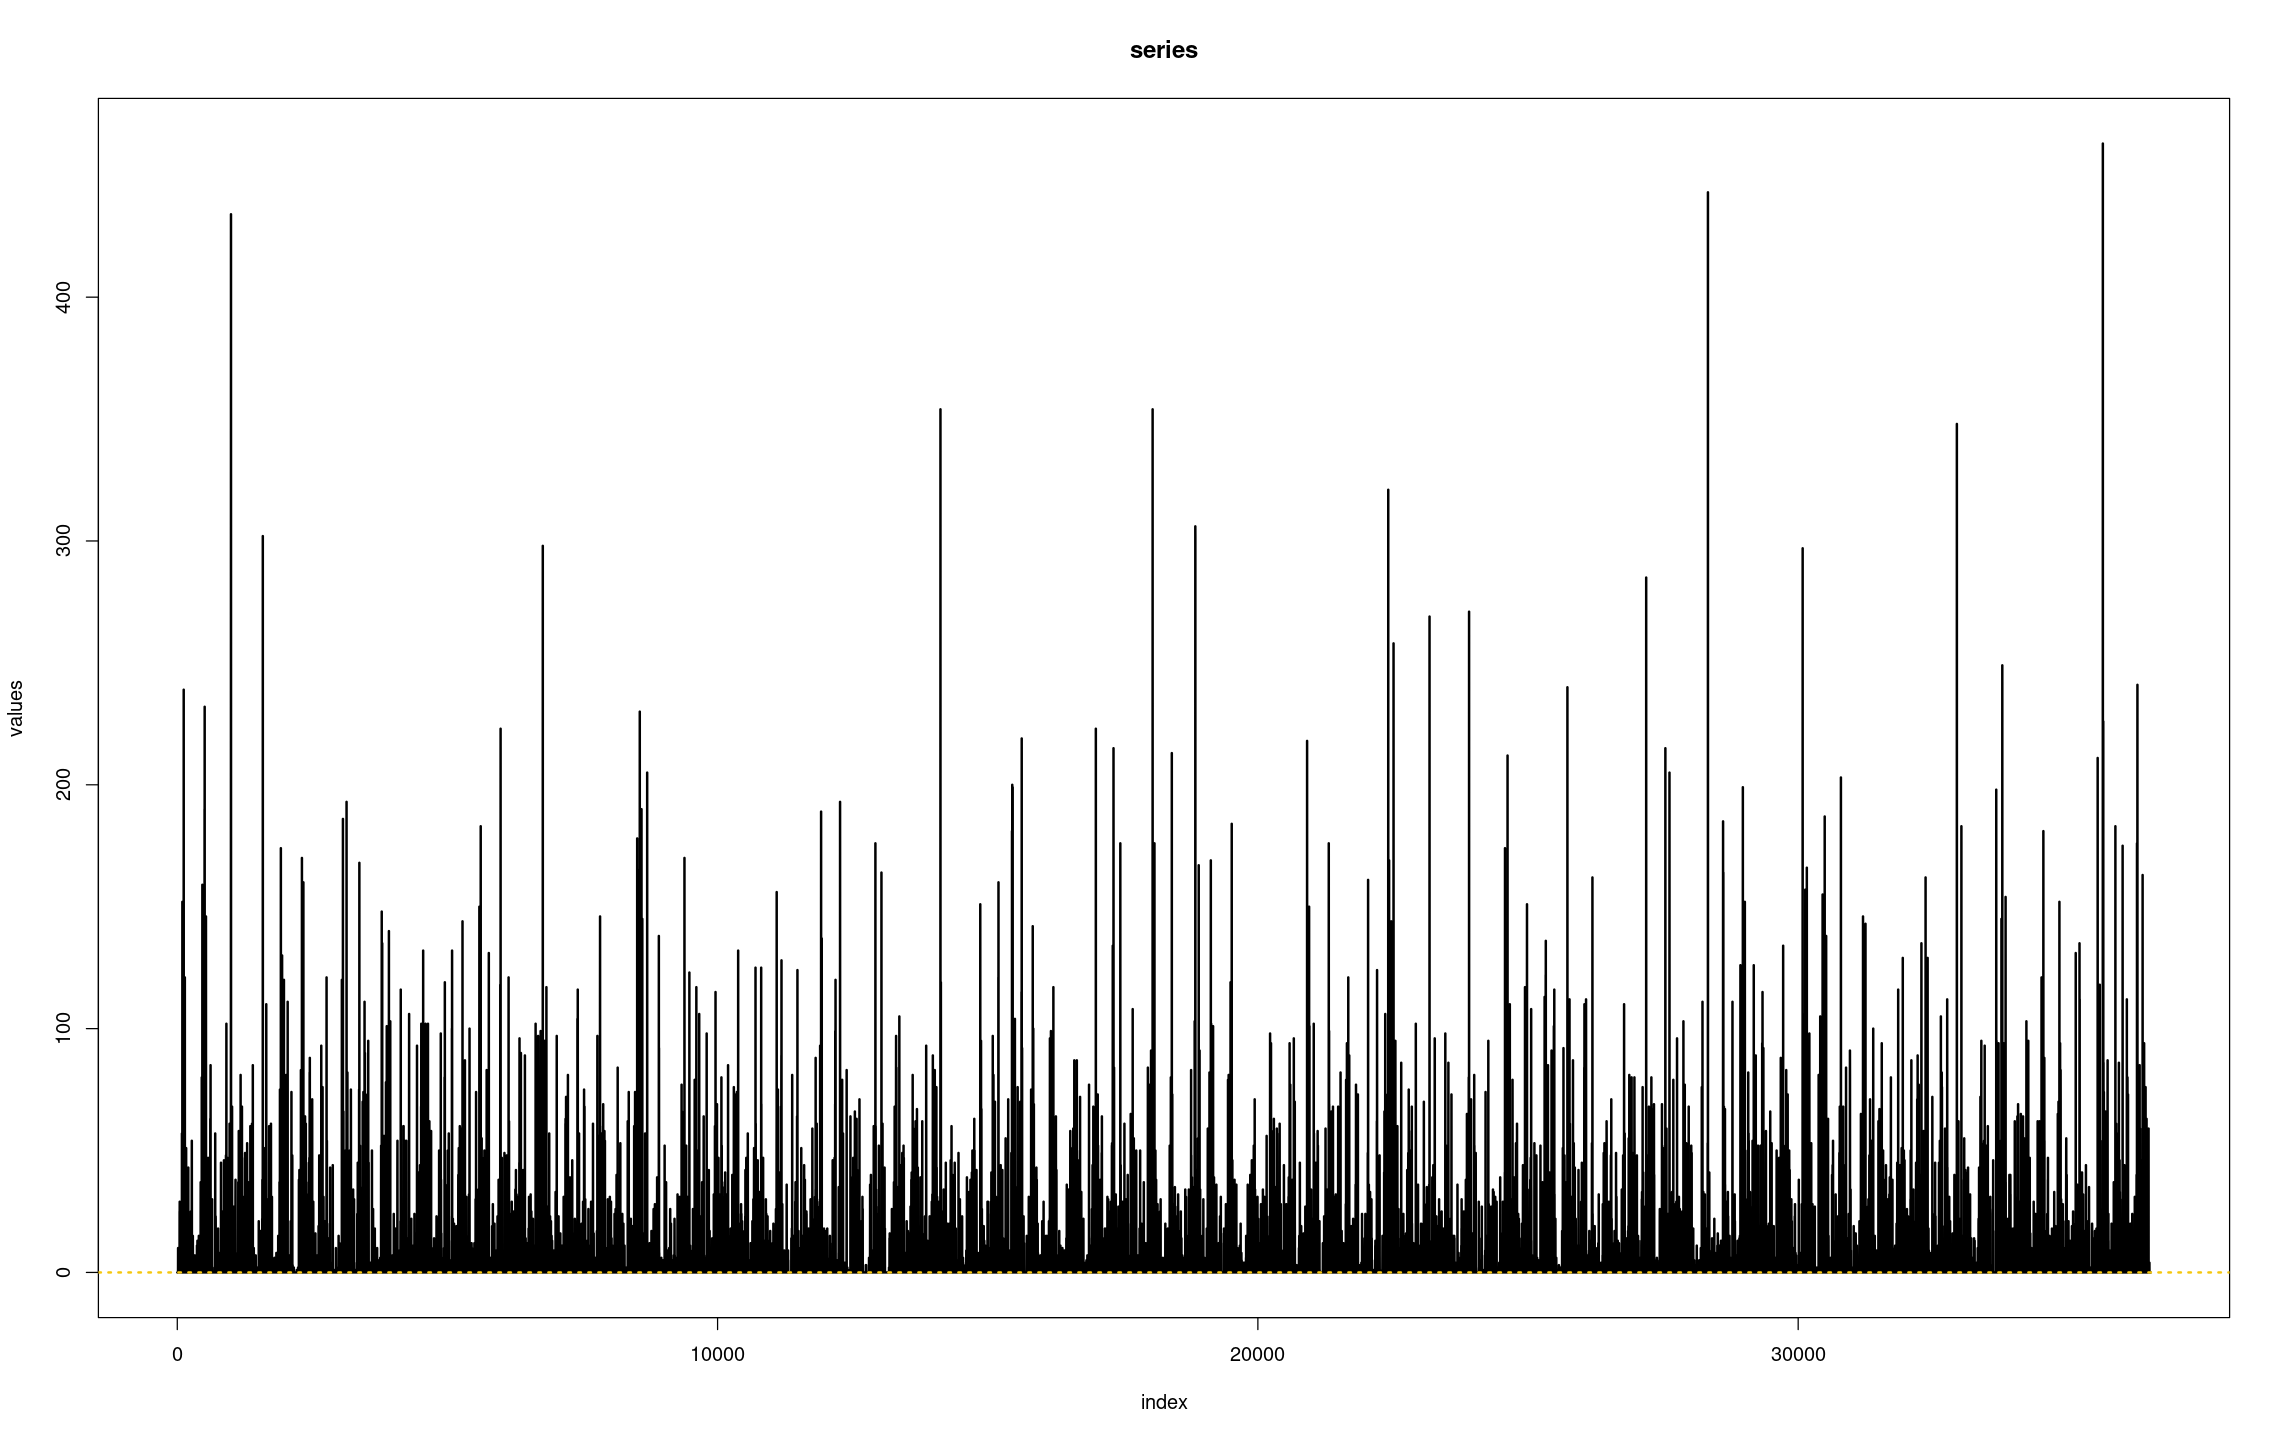

In [159]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)


In [160]:
x <- x_raw

------------------------------------------------------------------------------ 
x (numeric)

      length          n       NAs    unique        0s      mean      meanCI'
      36'524     36'524         0       212    24'193  4.181415    4.010381
                 100.0%      0.0%               66.2%              4.352449
                                                                           
         .05        .10       .25    median       .75       .90         .95
    0.000000   0.000000  0.000000  0.000000  0.000000  9.000000   23.000000
                                                                           
       range         sd     vcoef       mad       IQR      skew        kurt
  463.000000  16.676700  3.988291  0.000000  0.000000  8.858921  123.328987
                                                                           
lowest : 0.0 (24'193), 0.0 (4'173), 1.0 (1'122), 2.0 (856), 3.0 (543)
highest: 348.0, 354.0 (2), 434.0, 443.0, 463.0

heap(?): remarkable frequenc

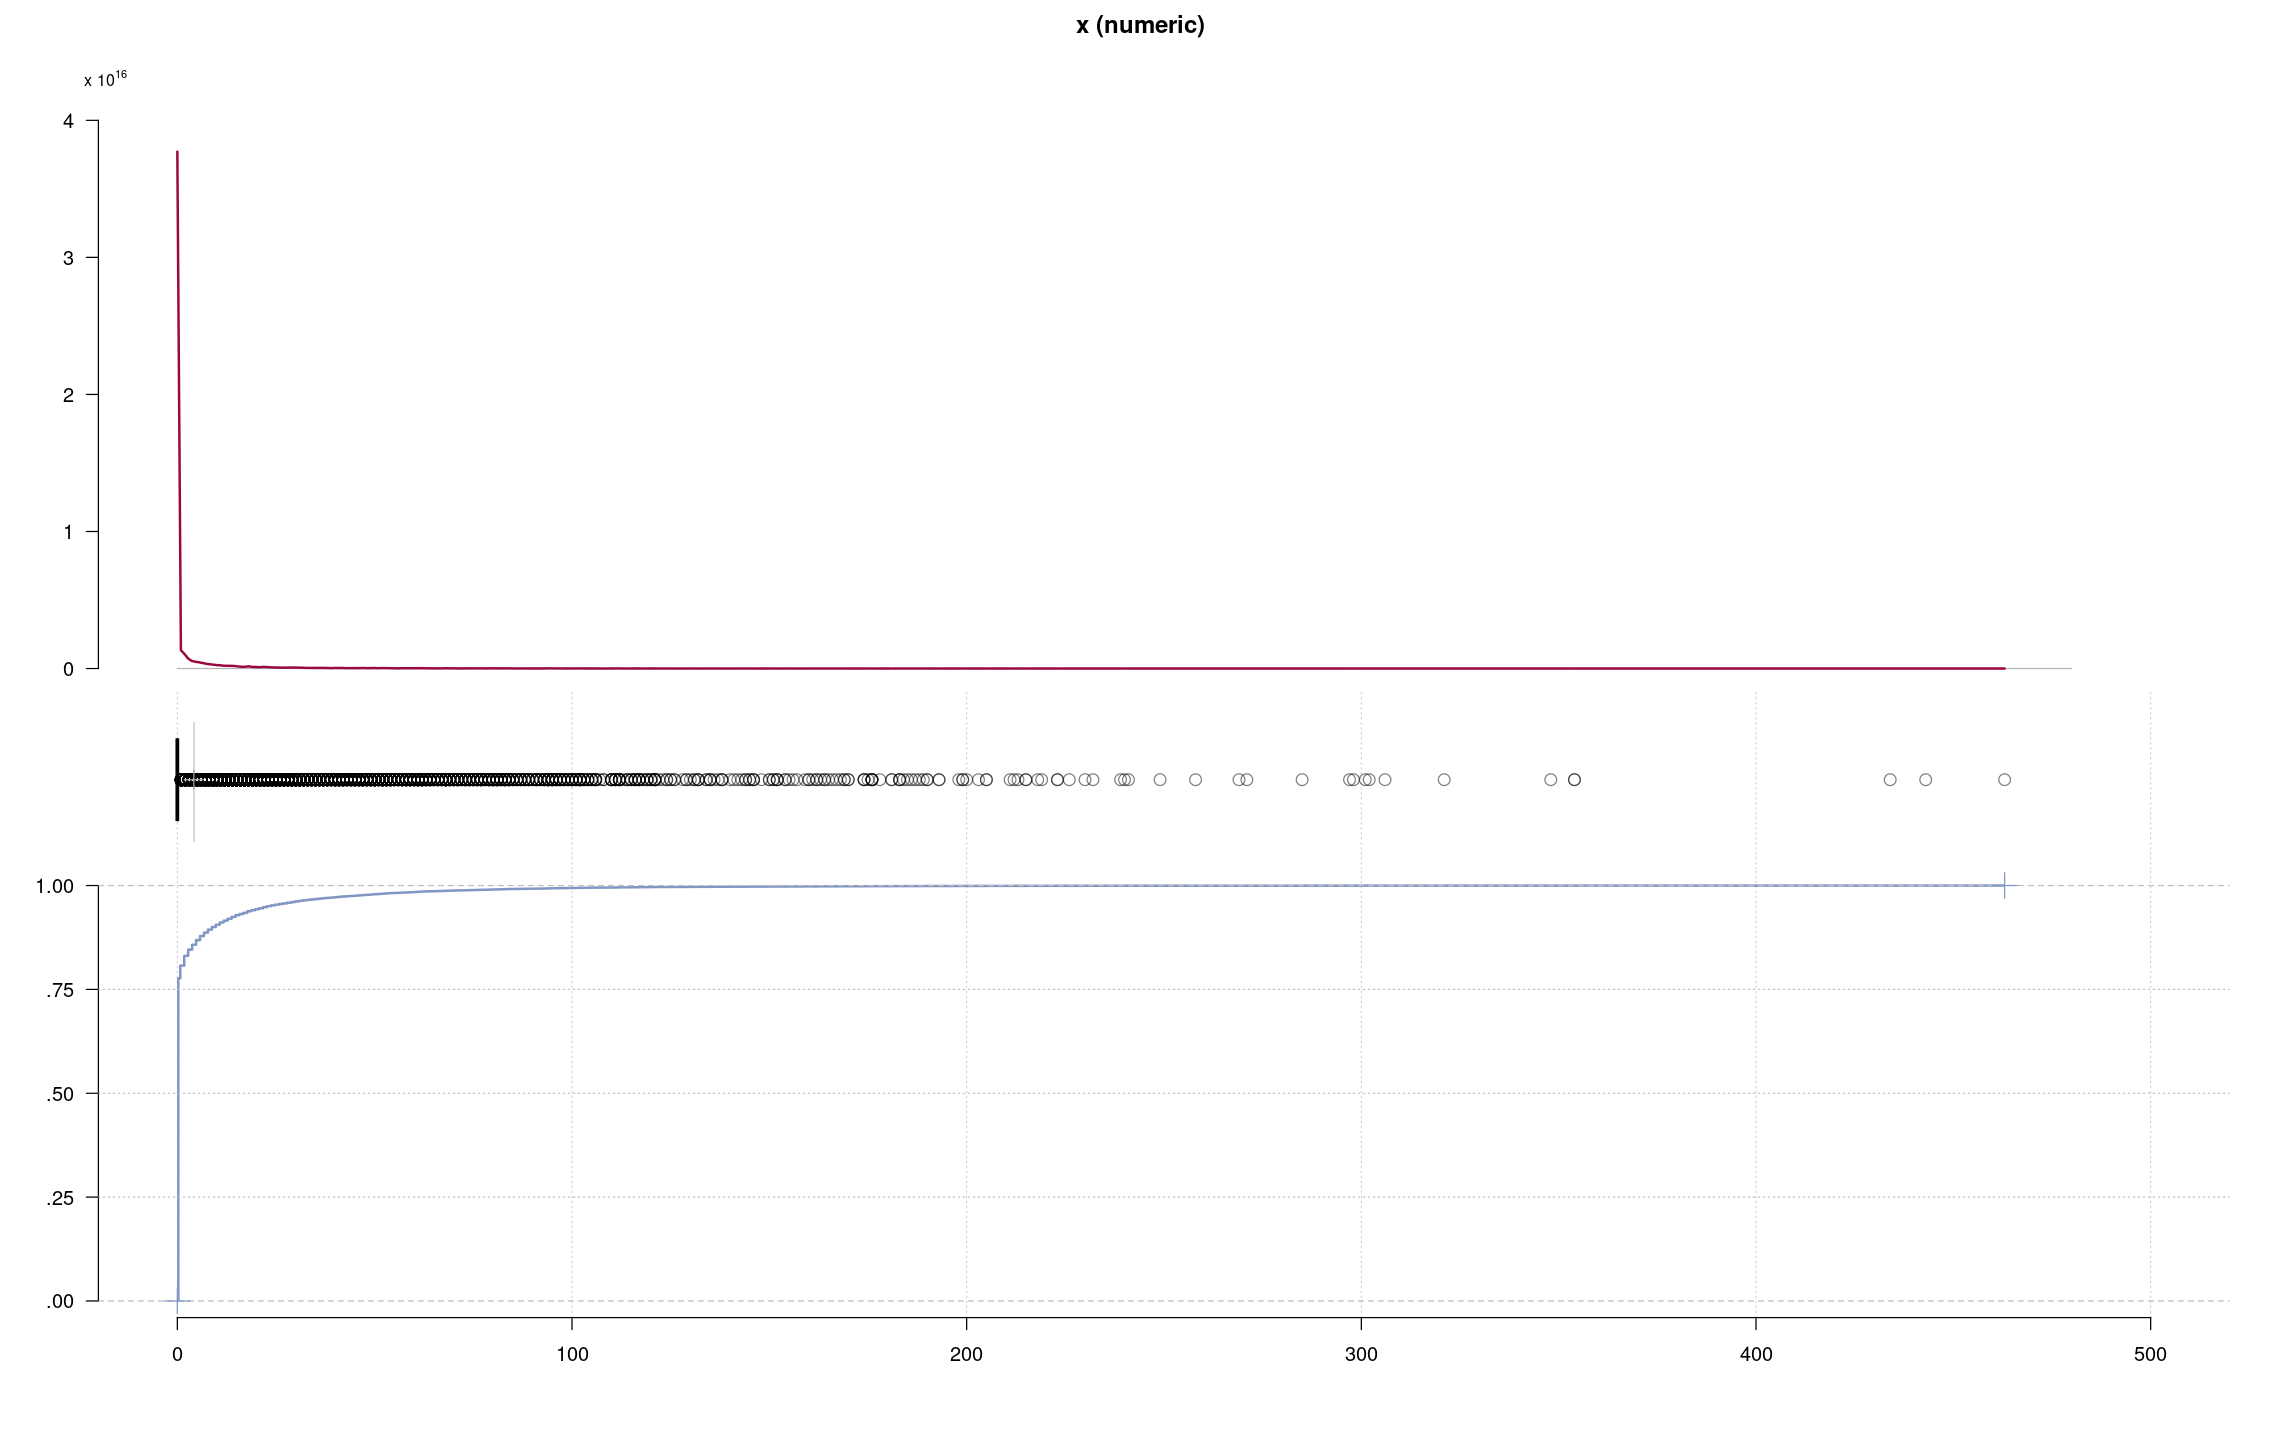

In [161]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [162]:
x <- x_raw[!is.na(x_raw)]
n <- length(x)

describe(x)

x 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   36524        0      212    0.708    4.181    7.699  0.0e+00  0.0e+00 
     .25      .50      .75      .90      .95 
 0.0e+00  0.0e+00  1.0e-16  9.0e+00  2.3e+01 

lowest : 0     1e-16 1     2     3    , highest: 348   354   434   443   463  

In [163]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# EVA: Stationary case

## Estimation

In [164]:
minimum_block_size <- find_minimum_block_size(x, threshold = mean(x))

print(minimum_block_size)

[1] 123


In [165]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 730


In [166]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 14


In [167]:
print(median(x))

[1] 0


In [168]:
print(calculate_mode(x))

[1] -2.464582151e-17


In [98]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = NULL, m = 50)

print(candidate_block_sizes)

  [1]   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
 [19]  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
 [37]  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
 [55]  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
 [73]  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
 [91]  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
[109] 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
[127] 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
[145] 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
[163] 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
[181] 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
[199] 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
[217] 222 223 224 225 226 227 228 229 230 231 232 233 234 235 23

In [169]:
z <- x[x > 0]
y <- z[z > quantile(x = z, probs = 0.5)]

In [139]:
y <- x[x > quantile(x = x, probs = 0.5)]

In [170]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = y,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

In [171]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [172]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

           loc_star  scale_star    shape_star
6     8.27615440873 16.02307667 0.33745047887
7     7.01638701536 15.18418424 0.35367240810
8     3.88201677688 17.29555566 0.30634296293
9     3.35292301914 16.99047111 0.30907684804
10    1.50115486744 17.63830372 0.29525862103
11    2.06349989042 19.14301625 0.26880591001
12    0.71501641142 18.77320941 0.27394137008
13   -1.32887341883 21.28620775 0.23682626413
14   -2.50968373638 22.21164801 0.22222225883
15    3.55573863801 19.19607752 0.26765638237
16    0.34808405745 20.33421009 0.24974856417
17   -3.12483373916 21.58943975 0.23544474680
18   -1.57558084617 21.28247952 0.23565711663
19   -6.43387545974 25.22346709 0.18894701008
20   -9.37025093116 25.33969145 0.19150913162
21   -7.51004116188 24.72720755 0.19403063233
22  -12.83709459491 27.84896981 0.16268331835
23  -10.86912621021 25.38557264 0.19171693464
24   -9.95788268622 26.90640337 0.18239889204
25  -10.04409865390 26.07645543 0.18505964278
26  -15.82631731806 29.23393250 0.

In [173]:
print(gev_mixture_model_object$weights)

             6              7              8              9             10 
0.011111111111 0.013526570048 0.009903381643 0.010144927536 0.009420289855 
            11             12             13             14             15 
0.009178743961 0.008695652174 0.006763285024 0.007487922705 0.008937198068 
            16             17             18             19             20 
0.008454106280 0.008212560386 0.008212560386 0.009661835749 0.011594202899 
            21             22             23             24             25 
0.007487922705 0.008454106280 0.008695652174 0.008454106280 0.008695652174 
            26             27             28             29             30 
0.011111111111 0.009661835749 0.010628019324 0.011111111111 0.007004830918 
            31             32             33             34             35 
0.009420289855 0.008695652174 0.007487922705 0.008937198068 0.009661835749 
            36             37             38             39             40 
0.0103864734

In [174]:
print(which.max(gev_mixture_model_object$weights))

7 
2 


In [175]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 2


In [176]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 2


In [177]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 72


In [178]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
59117.38037 61951.42518 


In [179]:
print(gev_mixture_model_object$threshold)

[1] 7


In [180]:
print(gev_mixture_model_object$equivalent_block_sizes)

  [1]   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
 [19]  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
 [37]  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
 [55]  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
 [73]  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
 [91]  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112


In [181]:
print(gev_mixture_model_object$extremal_indexes)

           6            7            8            9           10           11 
0.8501795317 0.9160159711 0.9160159711 0.9354547030 0.9445464139 0.8996411402 
          12           13           14           15           16           17 
0.9300203046 0.8996411402 0.8900444631 0.8770706116 0.8770706116 0.8745647935 
          18           19           20           21           22           23 
0.8617918164 0.8617918164 0.8704135791 0.8704135791 0.8770706116 0.8720541088 
          24           25           26           27           28           29 
0.8186753313 0.8325158831 0.8489821449 0.8054689313 0.8054689313 0.8186753313 
          30           31           32           33           34           35 
0.7726726748 0.7726726748 0.7726726748 0.8054689313 0.7726726748 0.8054689313 
          36           37           38           39           40           41 
0.8607120455 0.8164711851 0.7819134527 0.7683264888 0.7908307067 0.8054689313 
          42           43           44           45 

## Diagnostic

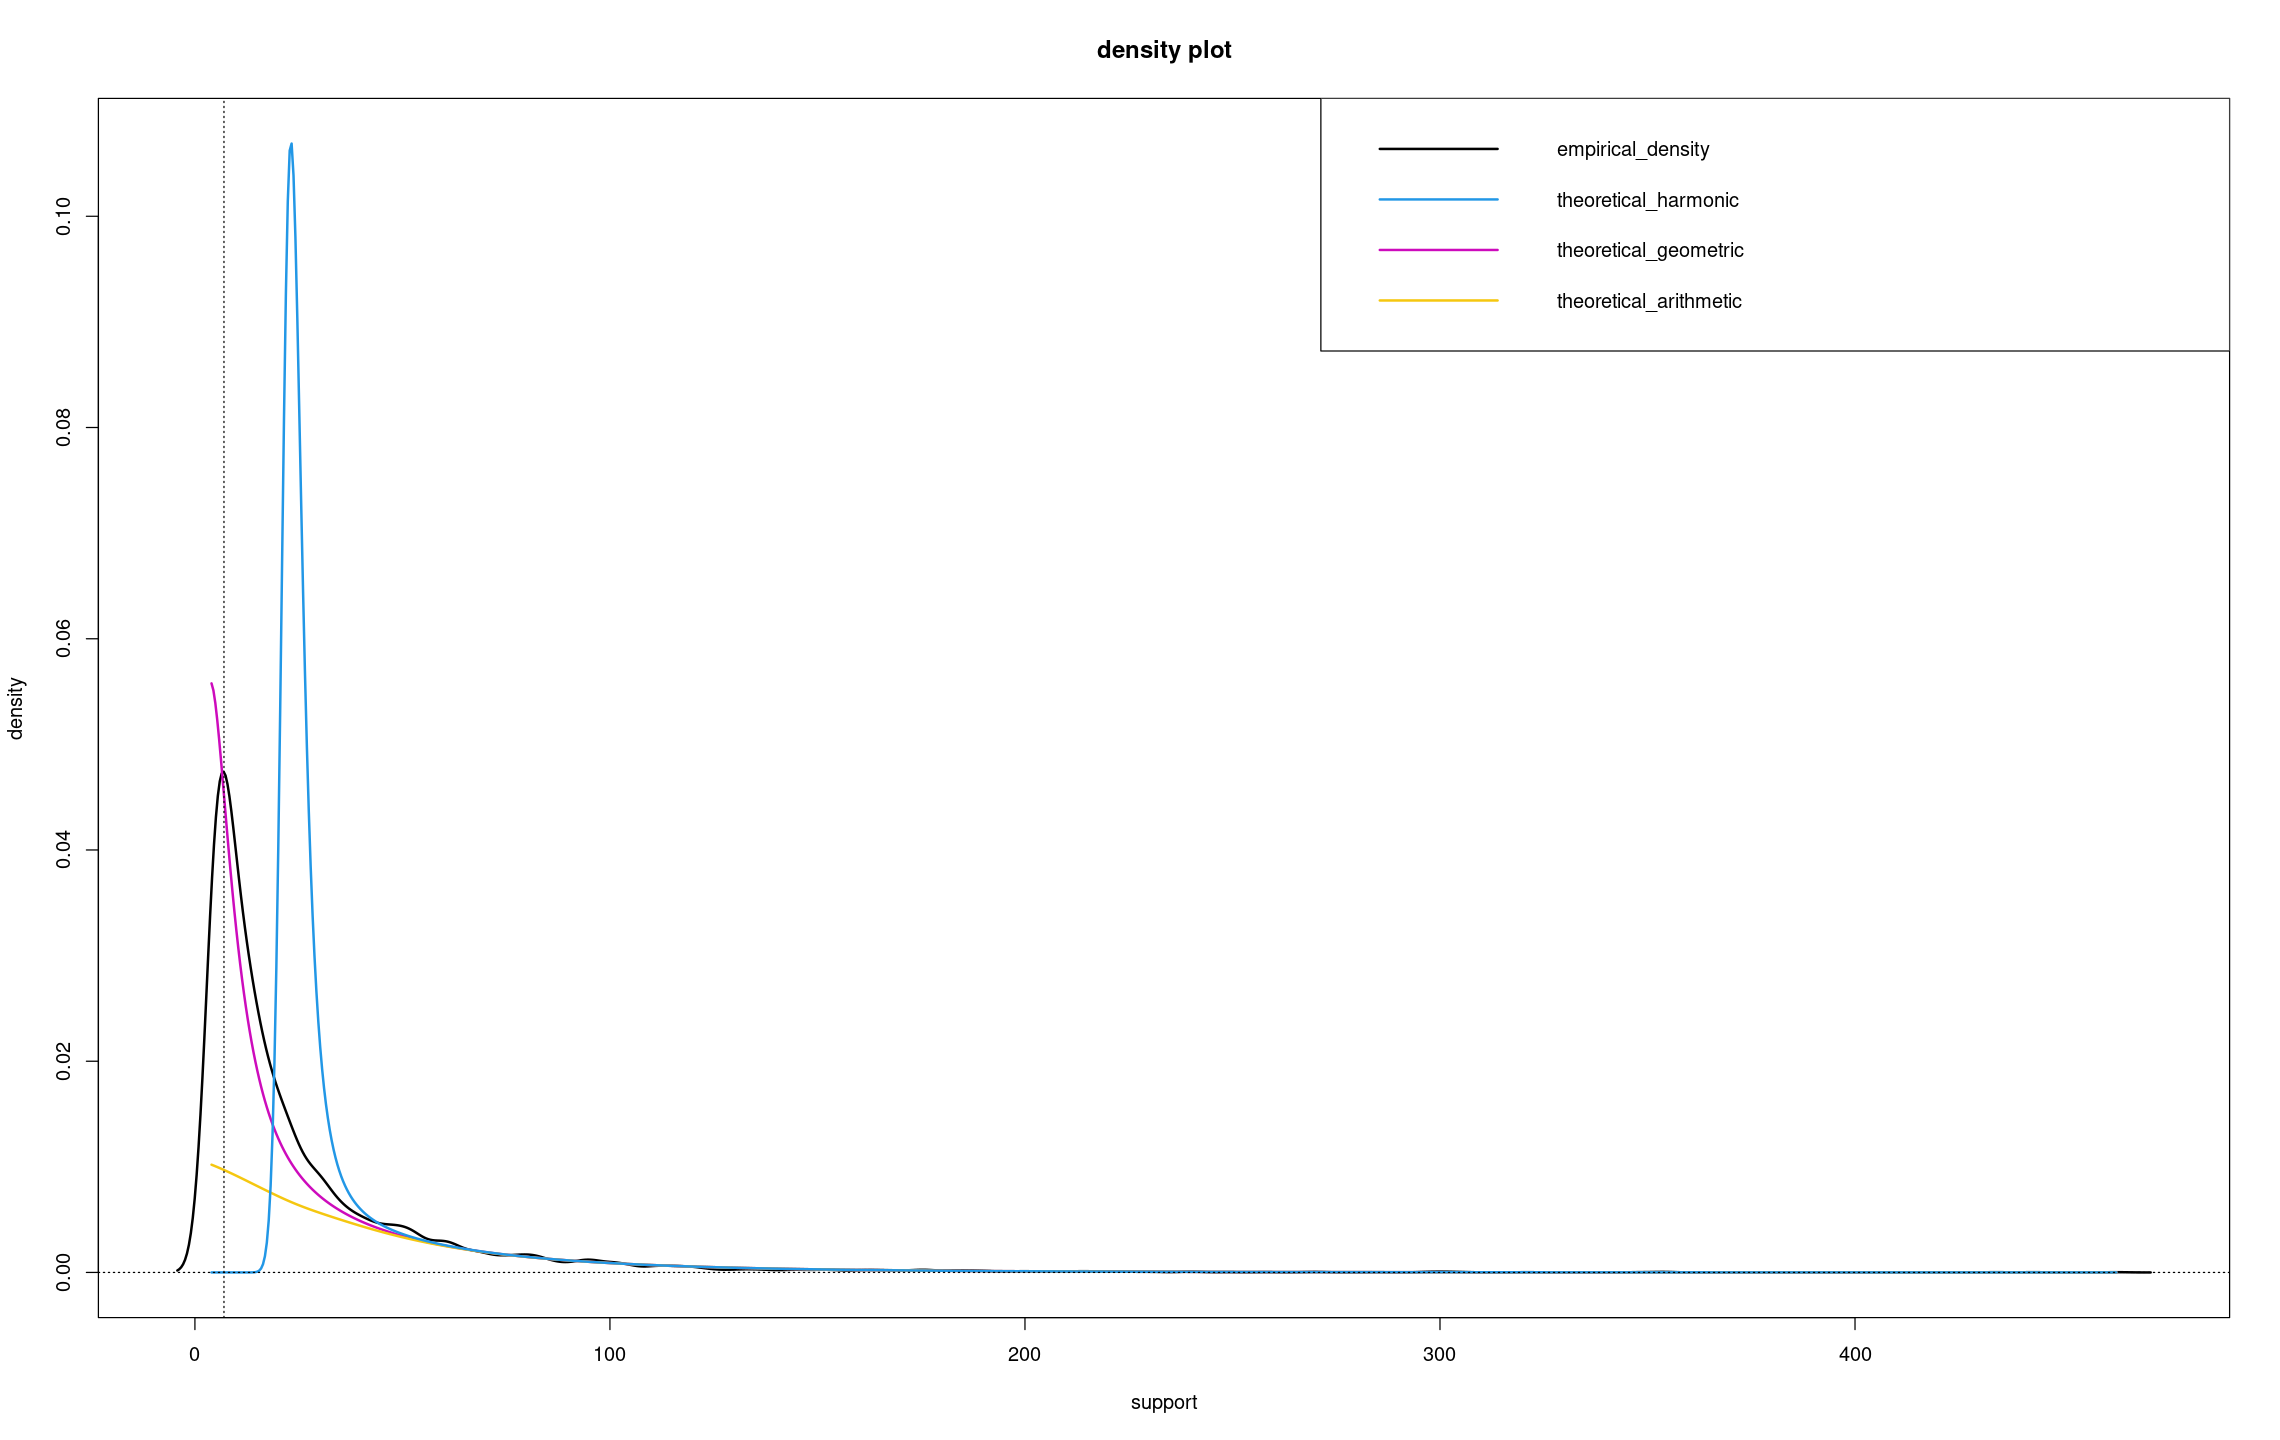

In [182]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

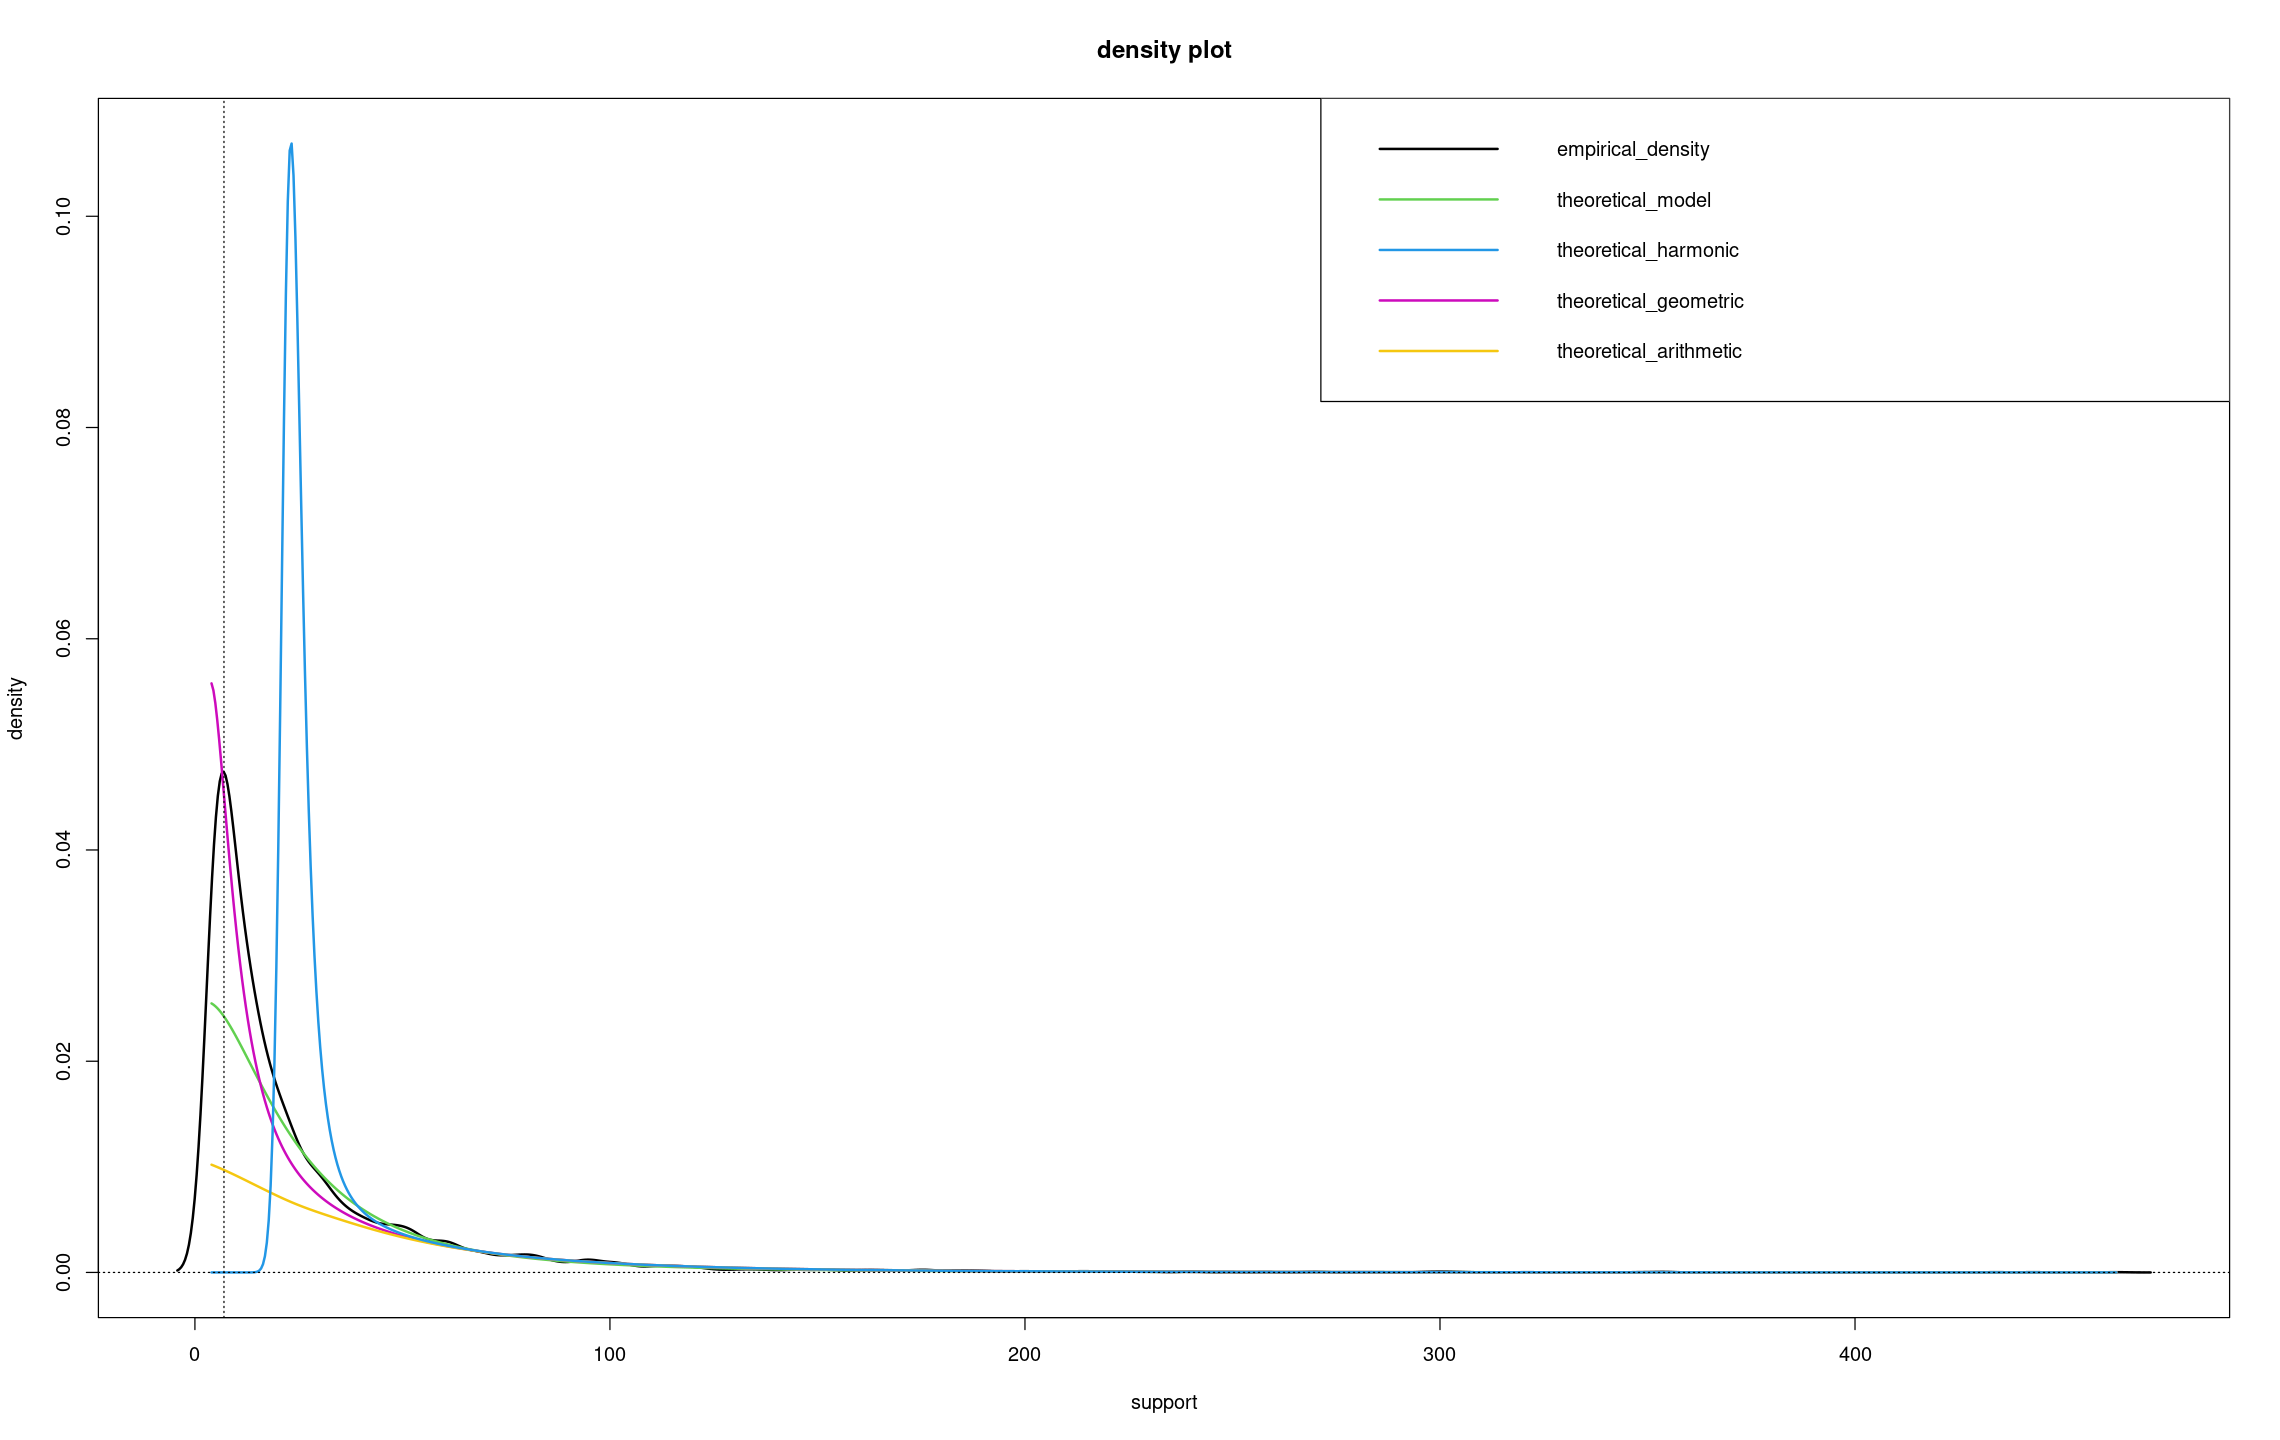

In [183]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

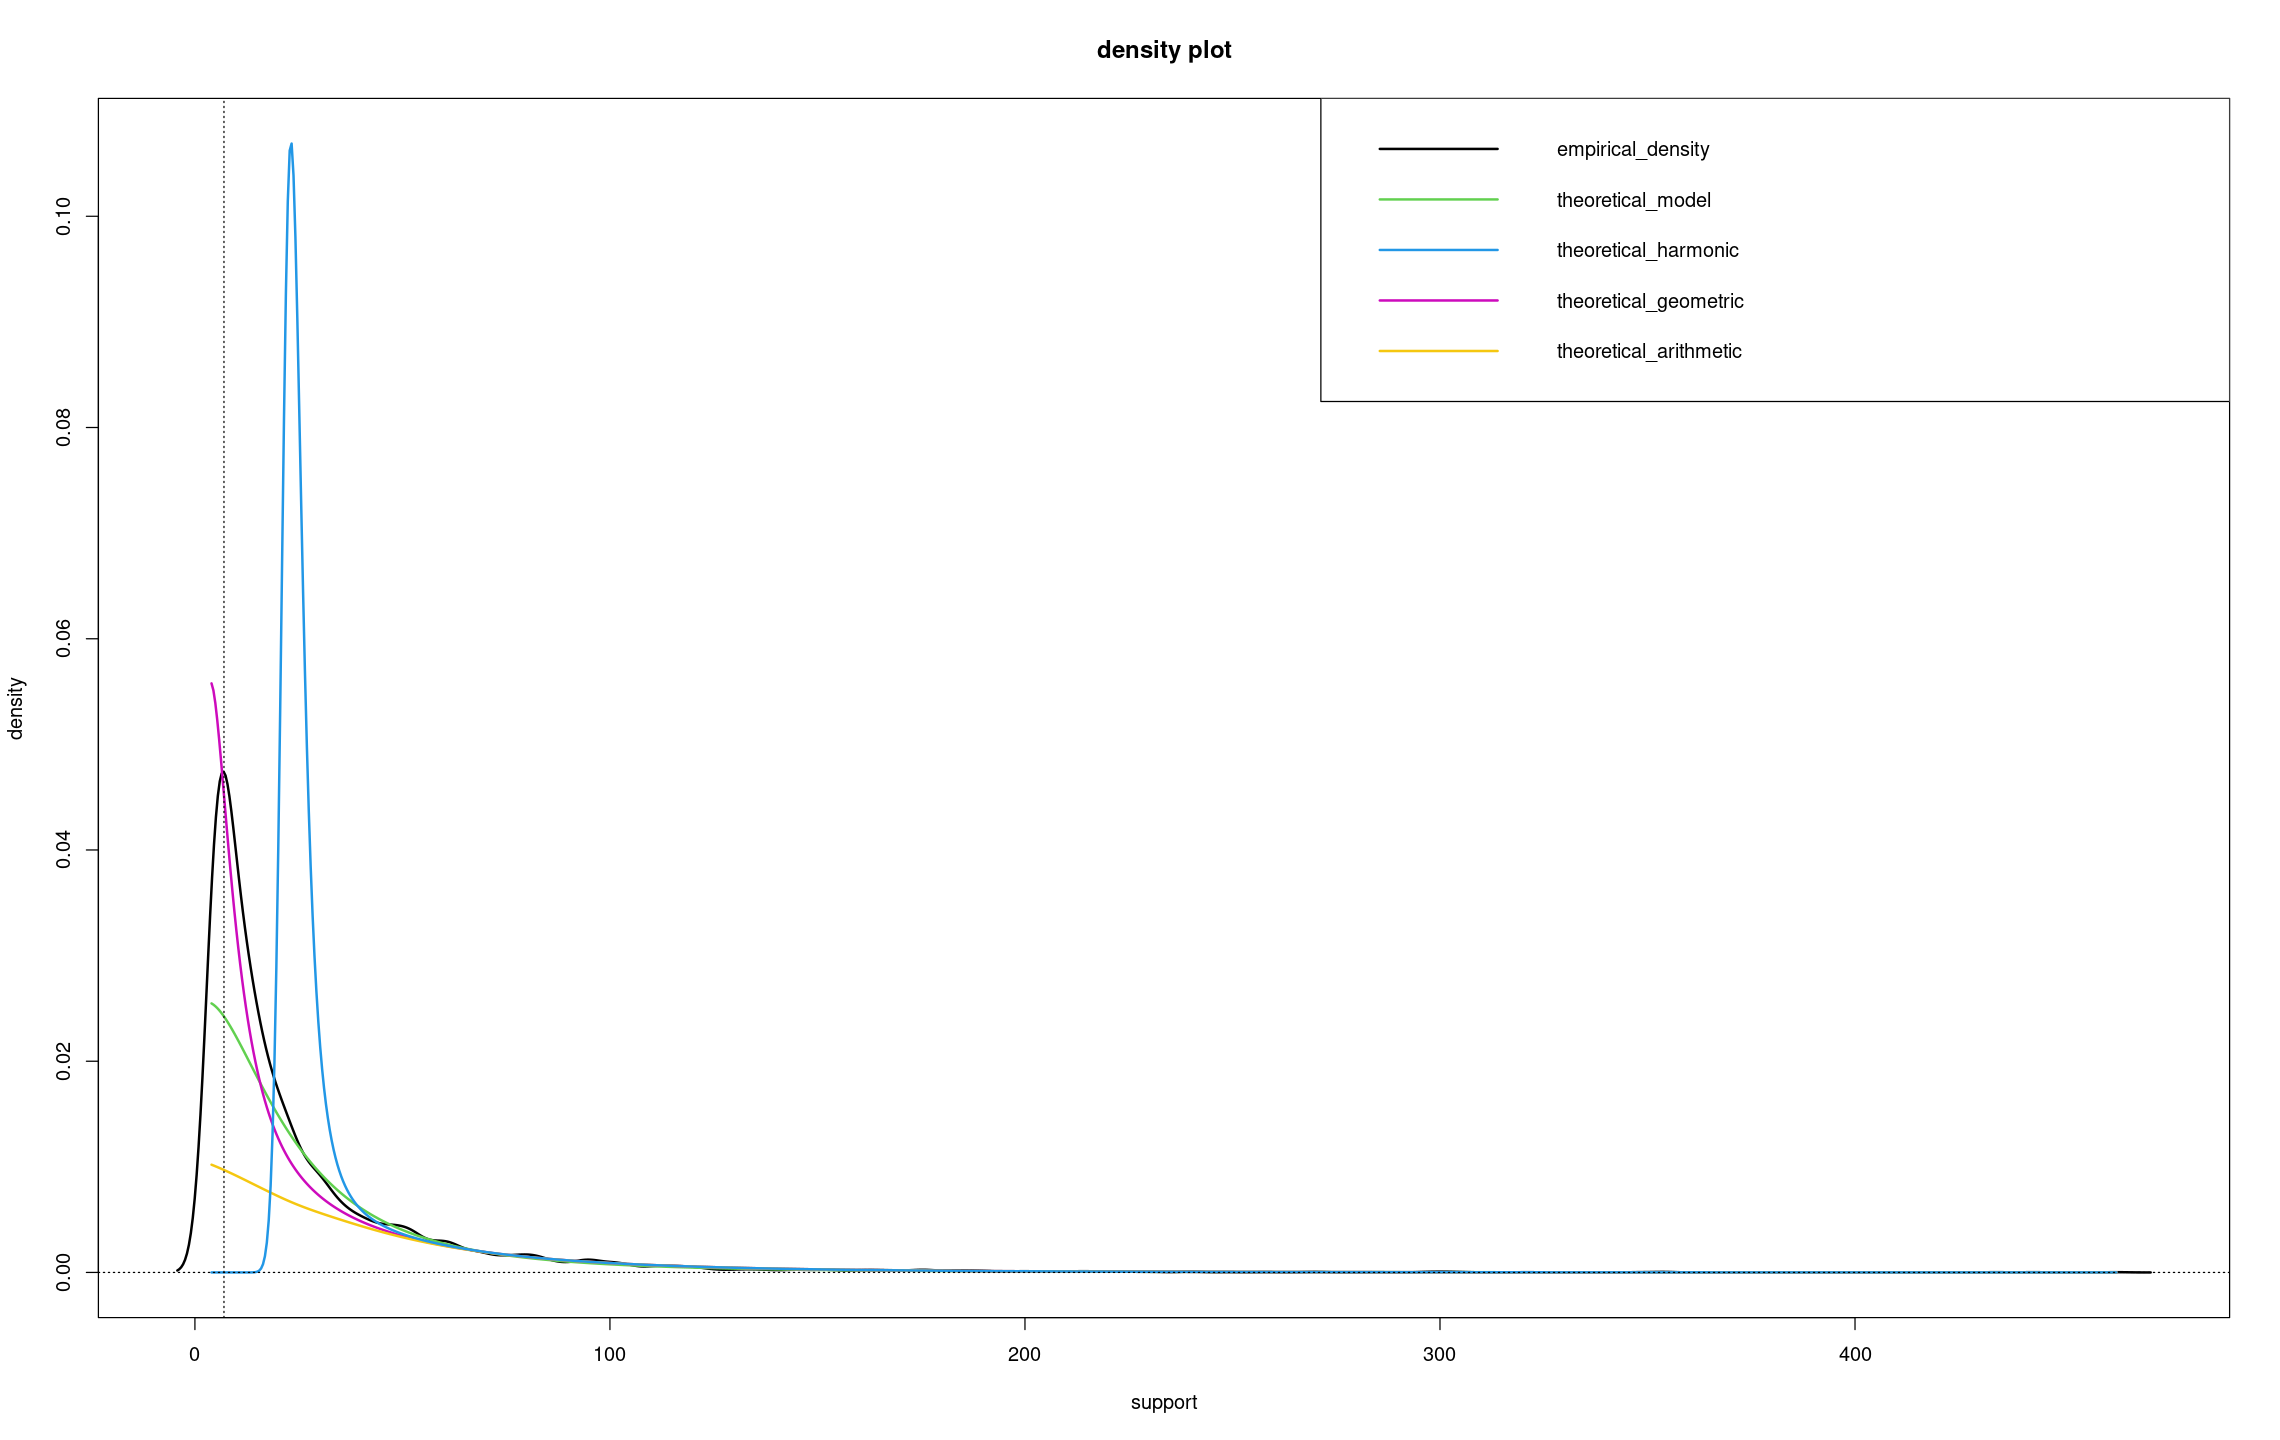

In [184]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

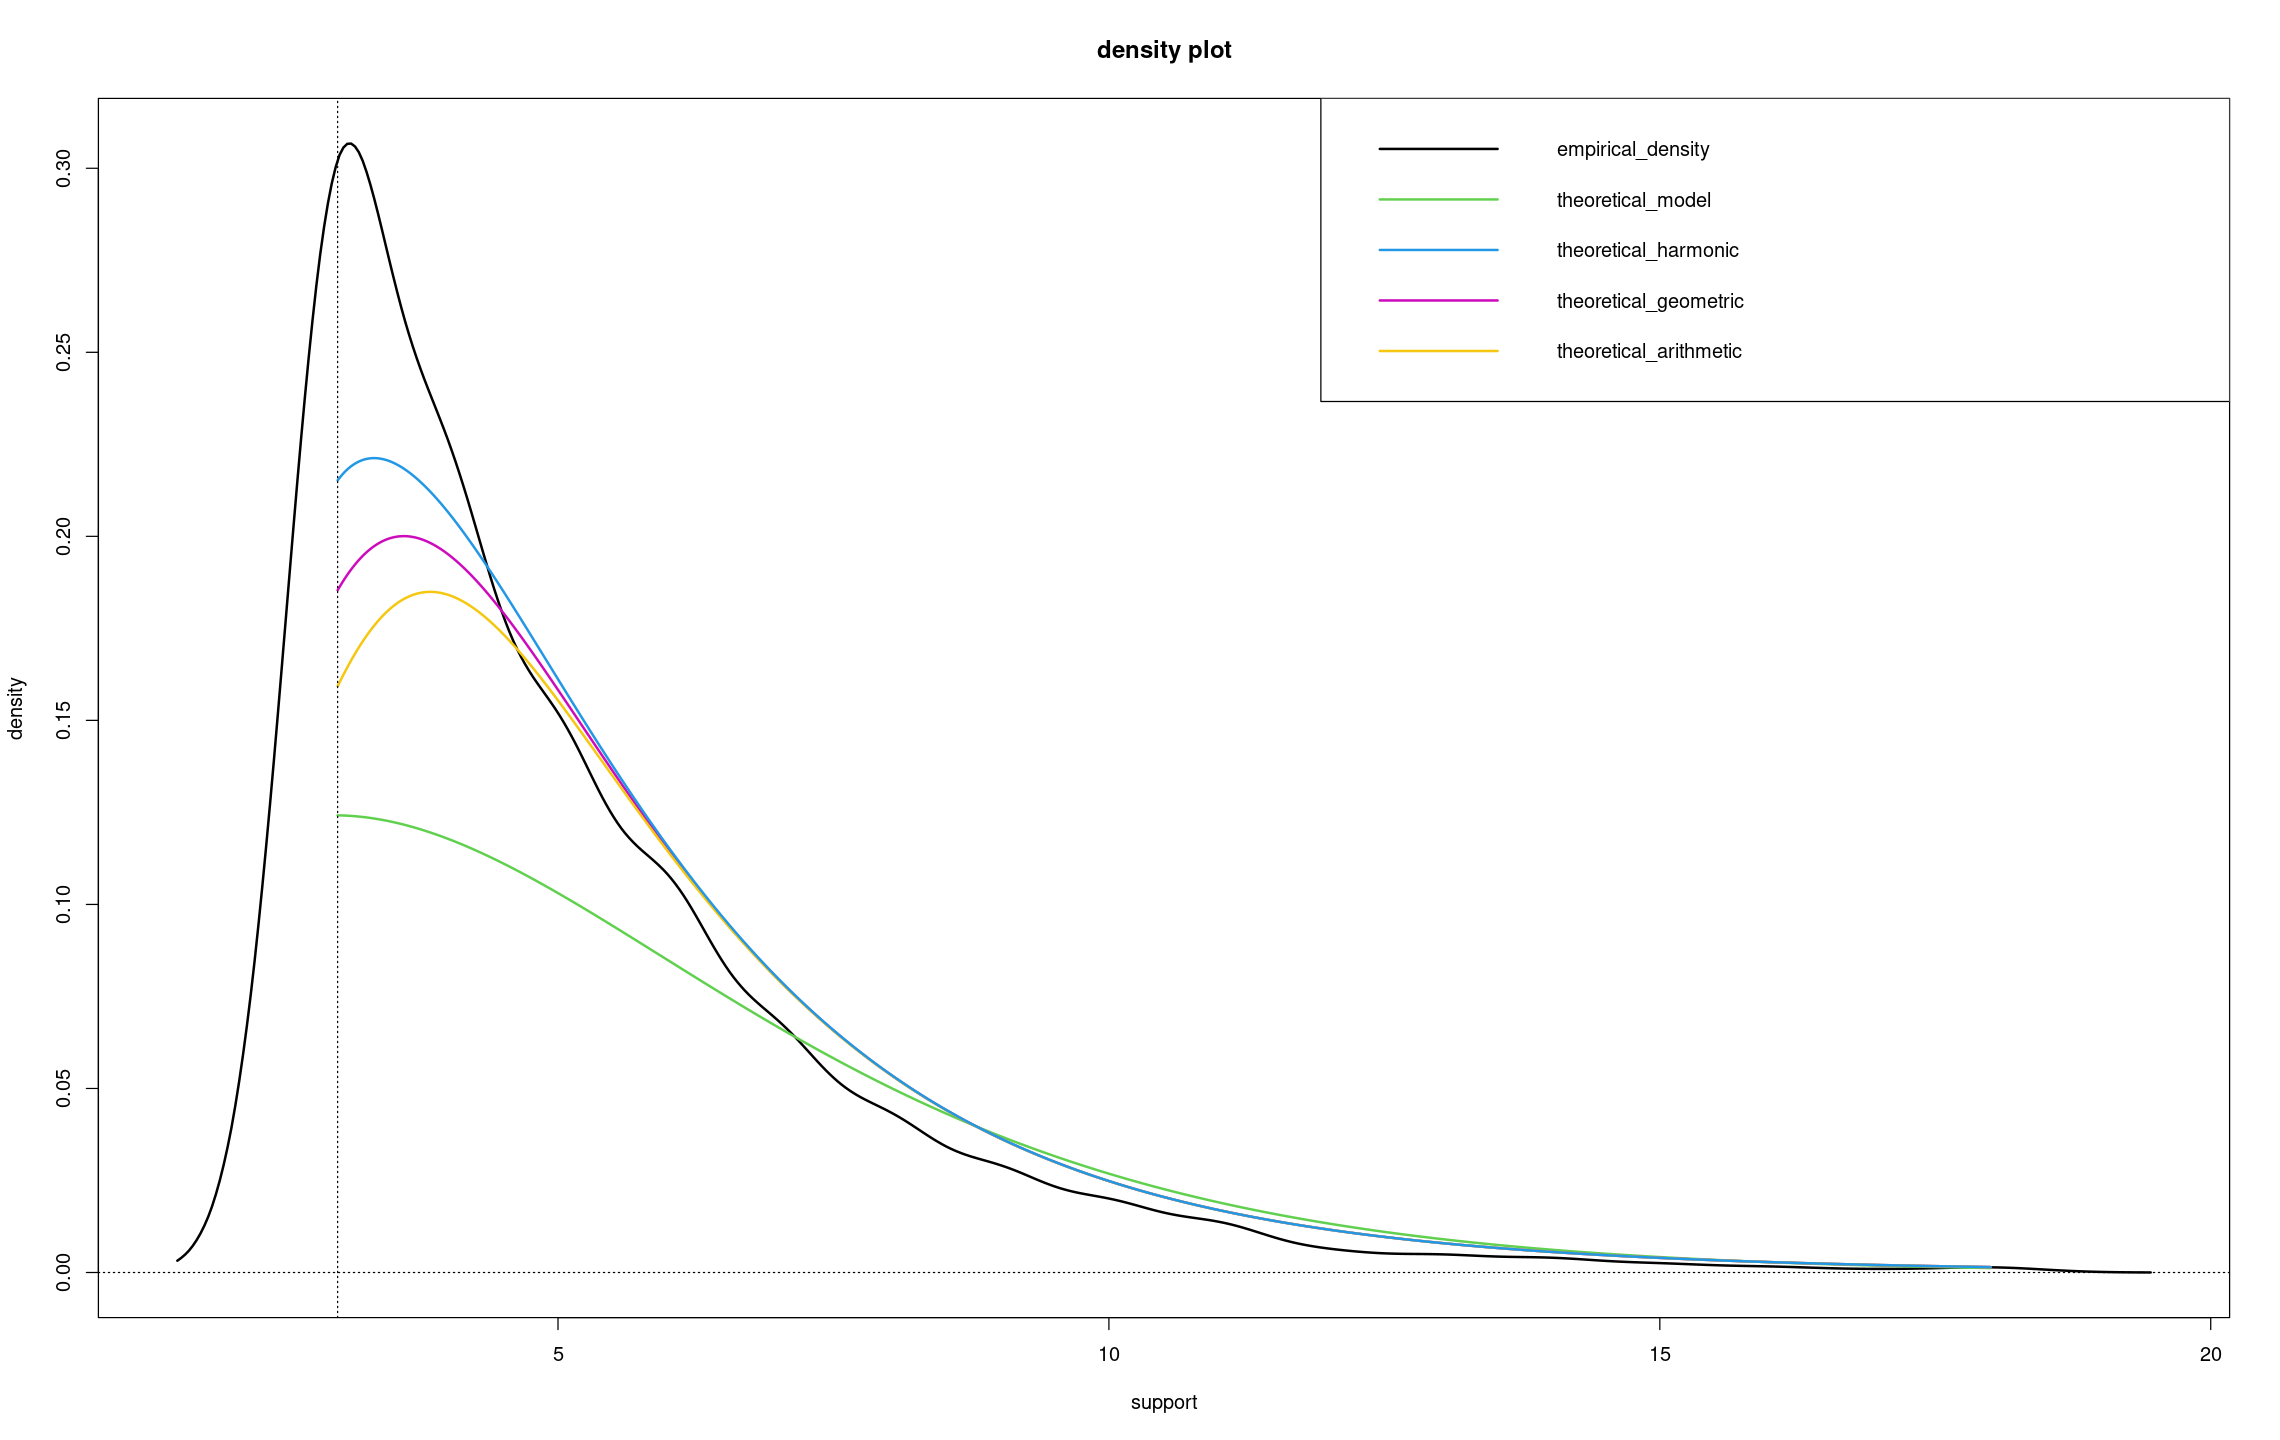

In [71]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [191]:
m <- 366*100

In [192]:
alpha <- m^(-1)

alpha

[1] 2.732240437e-05

In [42]:
alpha <- n^(-2)

print(alpha)

[1] 4.6765657e-09


In [43]:
true_quantile <- NULL

print(true_quantile)

NULL


In [193]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
6,801.3874383,1606.8316252,2412.275812
7,705.7347483,1729.1223133,2752.509878
8,578.7730821,1359.0886083,2139.404134
9,530.6110085,1362.8536716,2195.096335
10,459.9285536,1271.1671990,2082.405844
11,423.9758166,1131.0667302,1838.157644
12,391.7494215,1151.1824547,1910.615488
13,361.5552233,991.2673737,1620.979524
14,348.1984180,930.0729798,1511.947542


In [54]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

$quantiles_object
      lower_bound    estimate  upper_bound
378  -353.3885158 209.4155389  772.2195936
380  -637.6161904 306.2155827 1250.0473559
381 -1077.4722422 427.0700447 1931.6123316
384  -239.8408545 171.4333613  582.7075770

$gev_mixture_model_quantile
[1] 344.8410166

$smalest_lower_ci_bound
[1] -1077.472242

$largest_upper_ci_bound
[1] 1931.612332

$quantile_gev_inf
   lower_bound    estimate upper_bound
1 -750.2370631 1170.992987 3092.223037

$quantile_gev_sup
   lower_bound    estimate upper_bound
1 -22.24739345 53.36916017 128.9857138

In [55]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

$quantiles_object
      lower_bound    estimate  upper_bound
378  -353.3885158 209.4155389  772.2195936
380  -637.6161904 306.2155827 1250.0473559
381 -1077.4722422 427.0700447 1931.6123316
384  -239.8408545 171.4333613  582.7075770

$gev_mixture_model_quantile
[1] 344.8410406

$smalest_lower_ci_bound
[1] -1077.472242

$largest_upper_ci_bound
[1] 1931.612332

$quantile_gev_inf
   lower_bound    estimate upper_bound
1 -750.2370631 1170.992987 3092.223037

$quantile_gev_sup
   lower_bound    estimate upper_bound
1 -22.24739345 53.36916017 128.9857138

In [56]:
options(repr.plot.width=23, repr.plot.height=6)

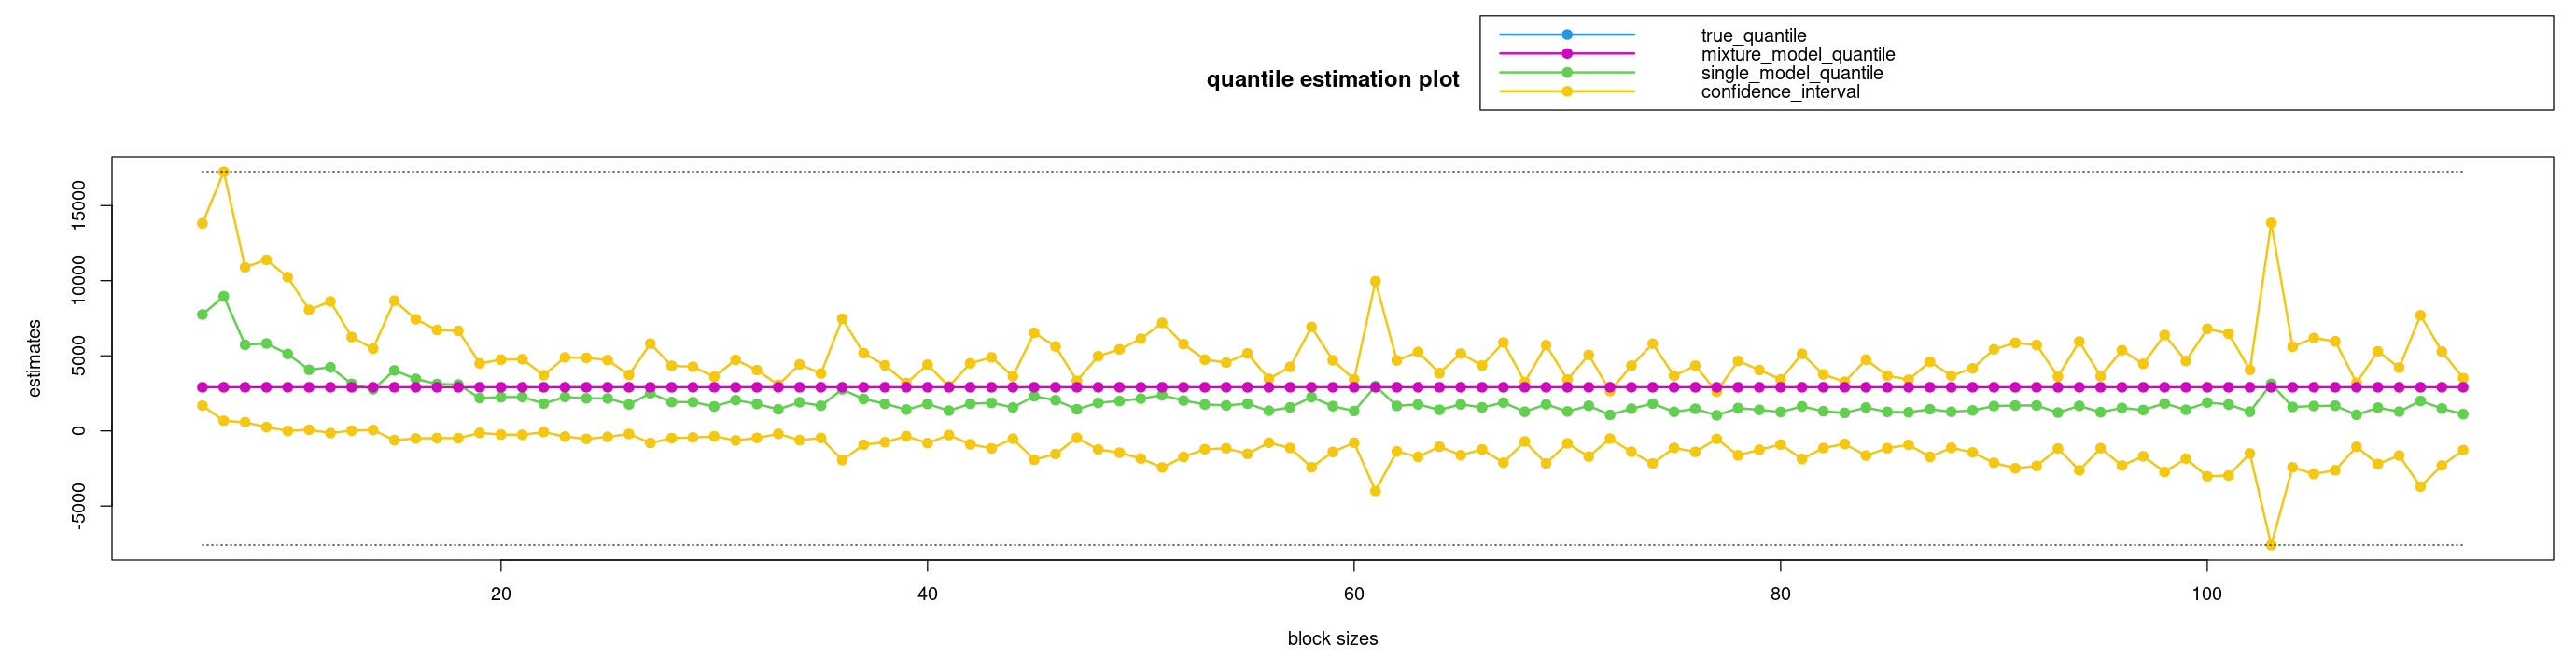

In [190]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")